# DBSCAN algorithm
- Read the data file
- Preprocess
    - Scale
    - Normalize
- Perform PCA to reduce dimentionality of data
- Perform nearest neighbors
- Perform DBSCAN
- get labels
- scatter plot of cluters

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [10]:
#Preprocessing
X = pd.read_csv('SuperMarketData.csv') 
# X.head()
  
# Dropping the CUST_ID column from the data 
X = X.drop('CustomerID', axis = 1)
X = X.drop('Gender', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

In [11]:
print(type(X))
len(X)

<class 'pandas.core.frame.DataFrame'>


200

In [12]:
X.head(5)

,Age,Monthly Income (kRs),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [18]:
# Scaling the data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) # fit the data in particular range

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

In [19]:
print(type(X_normalized))
X_normalized.shape

<class 'numpy.ndarray'>


(200, 3)

In [20]:
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

X_normalized.head(5)

,0,1,2
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


### PCA (Principal Component Analysis)
- It is a statistical procedure that uses an (orthogonal) transformation which converts a set of correlated variables to a set of uncorrelated variables. 
- It is  widely used tool in exploratory data analysis and in ML for predictive models
- is an unsupervised statistical technique used to examine the interrelations among a set of variables

In [21]:
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2) # 2 columns
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
# print(X_principal.head())
X_principal.columns = ['P1', 'P2'] # rename column

X_principal.head(5)

,P1,P2
0,-0.358146,-0.808495
1,-0.634308,-0.729439
2,-0.030129,-0.656543
3,-0.594864,-0.763586
4,-0.067077,-0.936304


In [22]:
X_principal.shape

(200, 2)

In [23]:
from sklearn.neighbors import NearestNeighbors

In [24]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_normalized)
distances, indices = nbrs.kneighbors(X_normalized)

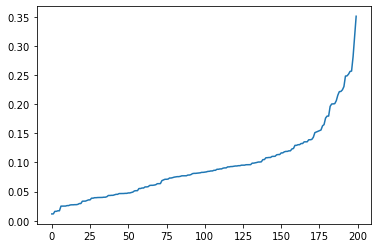

In [25]:
#sort and plot results

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

200
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


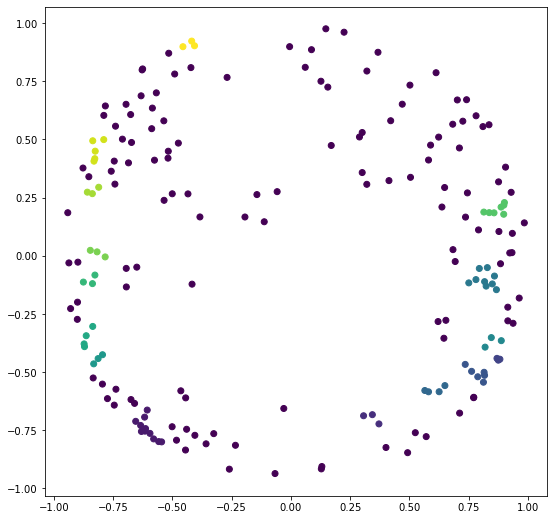

In [28]:
# Numpy array of all the cluster labels assigned to each data point 
# choosing eps=0.05
db_temp = DBSCAN(eps = 0.05, min_samples = 3).fit(X_principal) 
labels = db_temp.labels_ 
print(len(labels))

uniq_vals = np.unique(labels)
print(uniq_vals)

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = labels) 

plt.show() 

Matplotlib colors
    b : blue.
    g : green.
    r : red.
    c : cyan.
    m : magenta.
    y : yellow.
    k : black.
    w : white.

200
[-1  0  1  2]


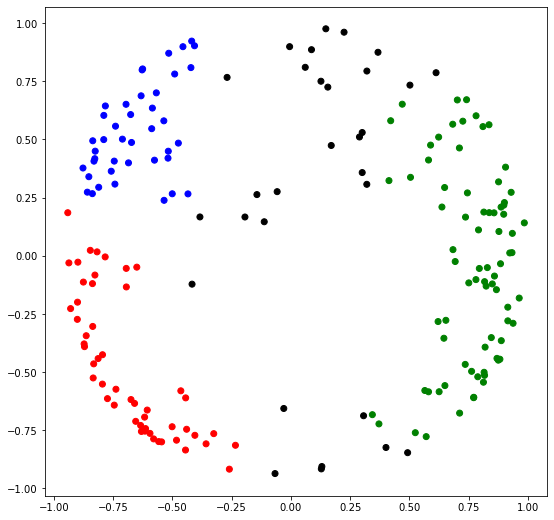

In [37]:
db = DBSCAN(eps = 0.25, min_samples = 15).fit(X_principal) # next sample
labels1 = db.labels_
print(len(labels1))

uniq_vals = np.unique(labels1)
print(uniq_vals)

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.show() 

[-1  0  1]


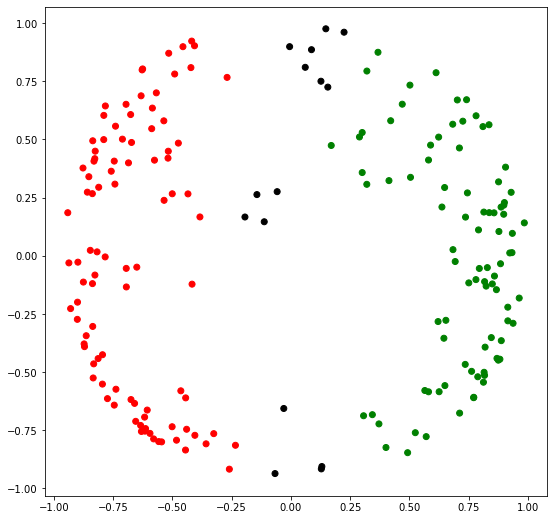

In [41]:
# play around it.
# eps is choose based on DISTANCES from NearestNeighbors.

db = DBSCAN(eps = 0.3, min_samples = 15).fit(X_principal)
labels1 = db.labels_
uniq_vals = np.unique(labels1)
print(uniq_vals)

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.show() 

In [ ]:
# This is a un-supervised learning, So we have to make decision on the eps and minPts.